# Elden Ring Weapon Analysis

The data was acquired from: https://www.kaggle.com/datasets/l3llff/-elden-ring-weapons

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("elden_ring_weapon.csv")

![intro](intro.jpg)

## What is Elden Ring?

Elden Ring is an upcoming action role-playing video game developed by FromSoftware in collaboration with George R.R. Martin. Set in a vast open world called the "Lands Between," players assume the role of the exiled "Tarnished" on a quest to restore the Elden Ring, a powerful artifact. The game offers challenging combat, exploration, and encounters with formidable enemies and bosses, combining FromSoftware's signature difficulty and intricate level design with deep character customization. 

## Data Extraction and Exploration

In [2]:
df.head()

,Name,Type,Phy,Mag,Fir,Lit,Hol,Cri,Sta,Str,...,Any,Phy.1,Mag.1,Fir.1,Lit.1,Hol.1,Bst,Rst,Wgt,Upgrade
0,Academy Glintstone Staff,Glintstone Staff,43,-,-,-,-,100,40,D,...,-,25,15,15,15,15,15,10,3.0,Smithing Stones
1,Alabaster Lord's Sword,Greatsword,313,93,-,-,-,100,126,B,...,-,56,33,27,27,27,39,19,8.0,Somber Smithing Stones
2,Albinauric Bow,Bow,200,-,-,-,-,100,60,E,...,-,-,-,-,-,-,-,-,4.5,Smithing Stones
3,Albinauric Staff,Glintstone Staff,29,-,-,-,-,100,38,D,...,-,23,14,14,14,14,14,9,2.5,Smithing Stones
4,Antspur Rapier,Thrusting Sword,240,-,-,-,-,100,62,D,...,(55),47,31,31,31,31,25,10,3.0,Smithing Stones


In [3]:
# Get the number of rows and columns
num_rows = df.shape[0]  # Number of rows
num_cols = df.shape[1]  # Number of columns

# Print the results
print("Number of rows:", num_rows)
print("Number of columns:", num_cols)

Number of rows: 307
Number of columns: 24


There are 307 different types of weapons present within the game and there are 24 different sorts of attributes the weapons may be able to possess

In [4]:
df.columns

Index(['Name', 'Type', 'Phy', 'Mag', 'Fir', 'Lit', 'Hol', 'Cri', 'Sta', 'Str',
       'Dex', 'Int', 'Fai', 'Arc', 'Any', 'Phy.1', 'Mag.1', 'Fir.1', 'Lit.1',
       'Hol.1', 'Bst', 'Rst', 'Wgt', 'Upgrade'],
      dtype='object')

We come across these attributes that each weapon may have or not have:
- Name - name of weapon
- Type - type of weapon
- Phy - physical damage
- Mag - magical damage
- Fir - fire damage
- Lit - light damage
- Hol - holy damage
- Cri - critical damage
- Sta - stamina usage
- Str - strength scaling
- Dex - dexterity scaling
- Int - intelligence scaling
- Fai - faith scaling
- Arc - arcane scaling
- Any - special effect damage
- Phy - physical blocking damage
- Mag - magical blocking damage
- Fir - fire blocking damage
- Lit - light blocking damage
- Hol - holy blocking damage
- Bst - boost
- Wgt - wight of weapon
- Upgrade - which stone should be used to upgrade the weapon

### Weapon Types

In [5]:
x = df['Type'].nunique()
x

31

There are 31 unique types of weapons found in the game

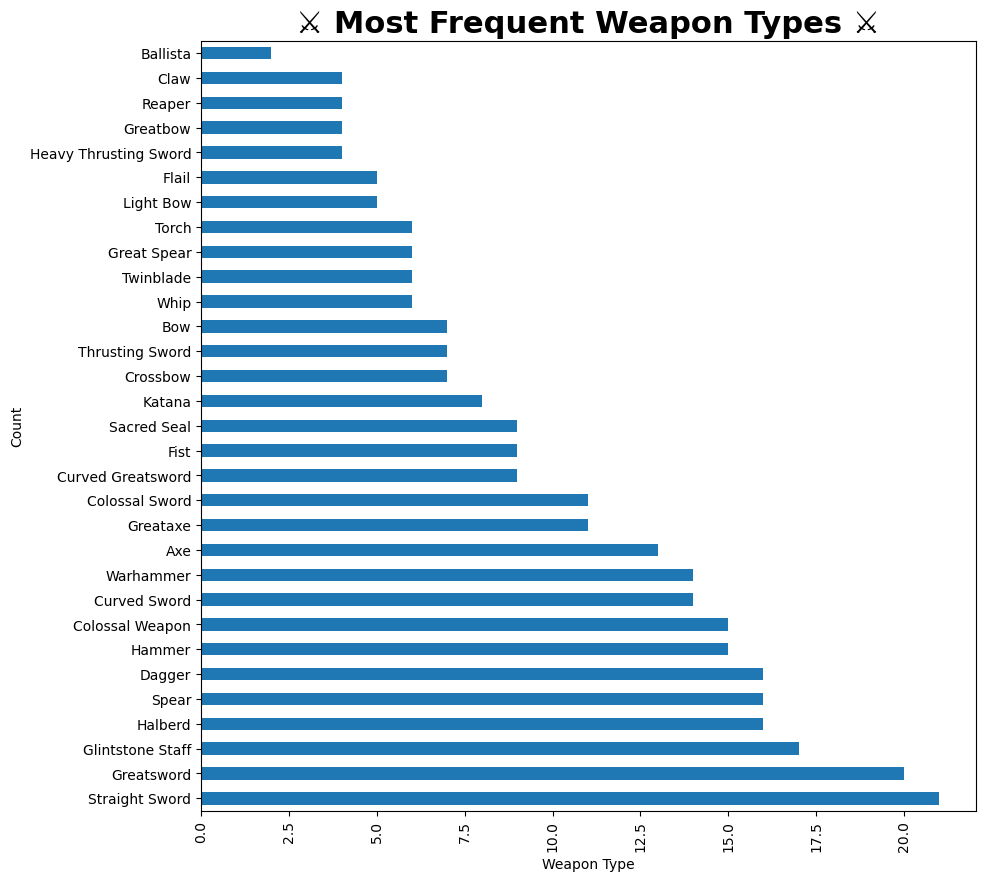

In [6]:
# Count the number of occurrences of each weapon type
weapon_counts = df['Type'].value_counts()

# Plotting
plt.figure(figsize=(10, 10))  # Set the figure size
weapon_counts.plot(kind='barh')  # Create a bar plot
plt.xlabel('Weapon Type')  # Set the x-axis label
plt.ylabel('Count')  # Set the y-axis label
plt.title('⚔️ Most Frequent Weapon Types ⚔️', size=22, weight="bold")  # Set the plot title
plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability
plt.show()  # Show the plot

Swords in general tend to be the most popular sort of weapons, including the straight sword and greatswords. For mages, or players that have a magic based build, the Glintstone Staff is also commonly found throughout the game. The rarest weapons to find are the Ballista and Claw type weapons 

<img src="weaponcat.jpg" alt="Image" width="40%">

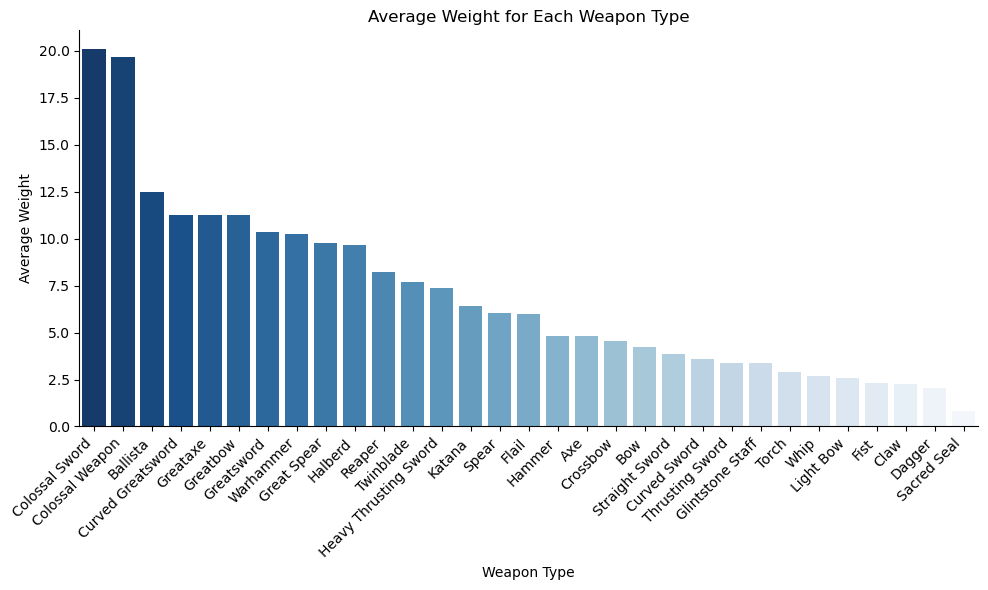

In [7]:
# Calculate average weight for each weapon type
average_weight = df.groupby('Type')['Wgt'].mean().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(10, 6))  # Set the figure size
sns.barplot(x=average_weight.index, y=average_weight.values, palette='Blues_r')
plt.xlabel('Weapon Type')  # Set the x-axis label
plt.ylabel('Average Weight')  # Set the y-axis label
plt.title('Average Weight for Each Weapon Type')  # Set the plot title
plt.xticks(rotation=45, ha='right')  # Rotate and align the x-axis labels for better readability
plt.gca().spines['top'].set_visible(False)  # Remove the top border
plt.gca().spines['right'].set_visible(False)  # Remove the right border
plt.tight_layout()  # Adjust the padding and spacing
plt.show()  # Show the plot

### Damage Analysis

In [24]:
# Cleaning data by replacing "-" with "0" and then converting all the values to a float value

# Replace "-" with 0 in the column
df['Phy'] = df['Phy'].replace('-', 0)
# Convert the column from object to integers
df['Phy'] = df['Phy'].astype(float)
# Check the data types after conversion

# Replace "-" with 0 in the column
df['Mag'] = df['Mag'].replace('-', 0)
# Convert the column from object to integers
df['Mag'] = df['Mag'].astype(float)
# Check the data types after conversion

# Replace "-" with 0 in the column
df['Hol'] = df['Hol'].replace('-', 0)
# Convert the column from object to integers
df['Hol'] = df['Hol'].astype(float)
# Check the data types after conversion
print(df.dtypes)

Name        object
Type        object
Phy        float64
Mag        float64
Fir         object
Lit         object
Hol        float64
Cri          int64
Sta          int64
Str         object
Dex         object
Int         object
Fai         object
Arc         object
Any         object
Phy.1       object
Mag.1       object
Fir.1       object
Lit.1       object
Hol.1       object
Bst         object
Rst         object
Wgt        float64
Upgrade     object
dtype: object


#### Average damage done by each weapon class

In [28]:

# Calculate average damage for each weapon type
average_physical_damage = df.groupby('Type')['Phy'].mean()
average_magic_damage = df.groupby('Type')['Mag'].mean()
average_holy_damage = df.groupby('Type')['Hol'].mean()

# Concatenate the average damage dataframes
average_damage = pd.concat([average_physical_damage, average_magic_damage, average_holy_damage], axis=1)

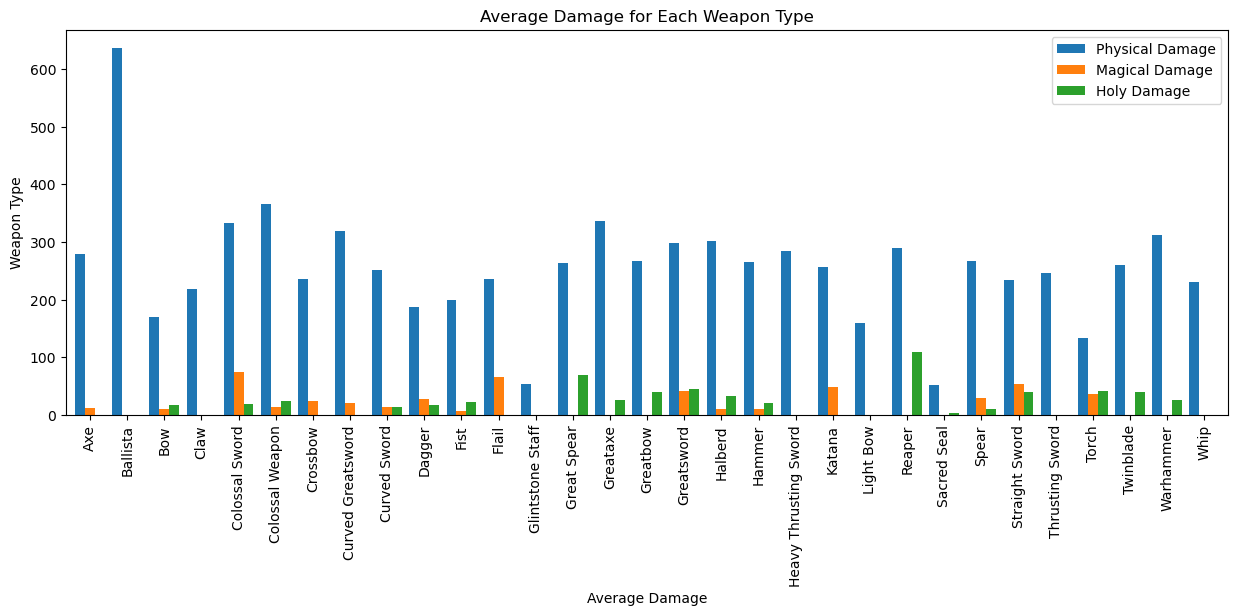

In [38]:
# Plotting
average_damage.plot(kind='bar', figsize=(15,5), width=0.8)
plt.xlabel('Average Damage')  # Set the x-axis label
plt.ylabel('Weapon Type')  # Set the y-axis label
plt.title('Average Damage for Each Weapon Type')  # Set the plot title
plt.xticks(rotation=90)  # Set x-axis label rotation to 0 degrees
plt.legend(['Physical Damage', 'Magical Damage', 'Holy Damage'])  # Add a legend
# plt.gca().invert_yaxis()  # Invert the y-axis to have the first category at the top
plt.show()  # Show the plot

Not all weapons provide all kinds of damage, some weapons only have physical or a combination of physical and holy or physical and magical or all 3 attributes. These types of damages were taken into consideration as they are the most common types of damage that can be dealt to the enemy. 

In [9]:
# Calculate average damage for each weapon type
average_damage = df.groupby('Type')[['Phy', 'Mag', 'Fir', 'Lit', 'Hol', 'Cri', 'Any']].mean()

# Find the weapon type with the highest average damage
weapon_type_with_highest_avg_damage = average_damage.mean(axis=1).idxmax()

weapon_type_with_lowest_avg_damage = average_damage.mean(axis=1).idxmin()

# Print the result
print("Weapon type with the highest average damage:", weapon_type_with_highest_avg_damage)
print("Weapon type with the lowest average damage:", weapon_type_with_lowest_avg_damage)

Weapon type with the highest average damage: Dagger
Weapon type with the lowest average damage: Ballista


#### Physical Damage Distribution

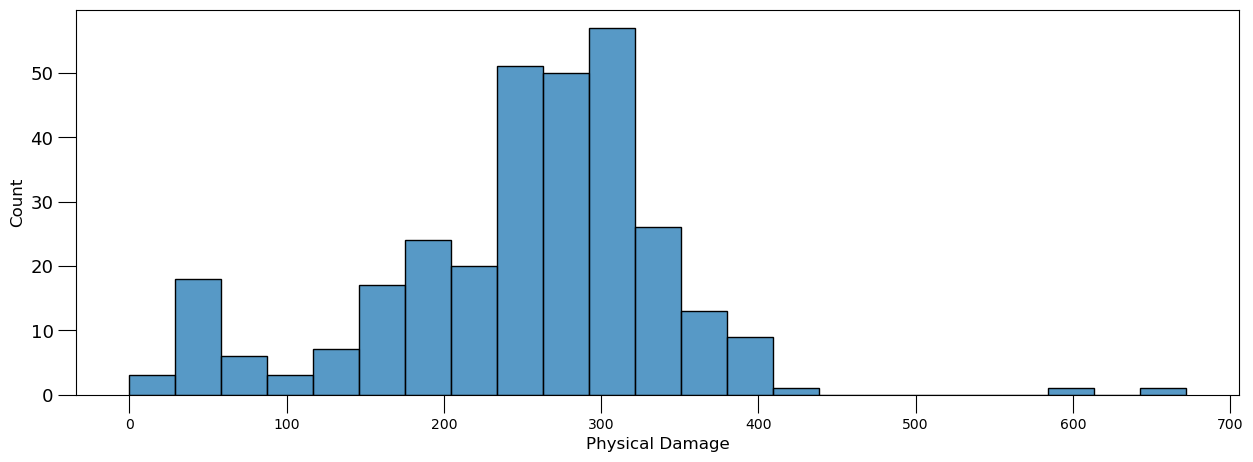

In [49]:
fig, ax = plt.subplots(figsize=(15,5))
sns.histplot(data=df, x='Phy');
plt.ylabel("Count", size = 12)
plt.xlabel("Physical Damage", size = 12)
plt.yticks(size=13)
plt.tick_params(size=13)

#### Magical Damage Distribution

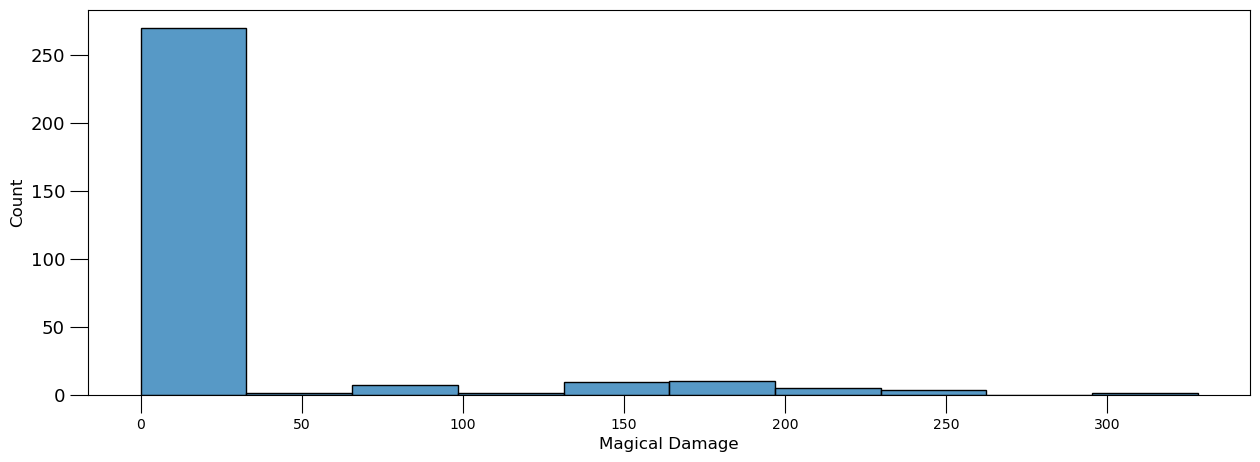

In [47]:
fig, ax = plt.subplots(figsize=(15,5))
sns.histplot(data=df, x='Mag');
plt.ylabel("Count", size = 12)
plt.xlabel("Magical Damage", size = 12)
plt.yticks(size=13)
plt.tick_params(size=13)

#### Holy Damage Distribution

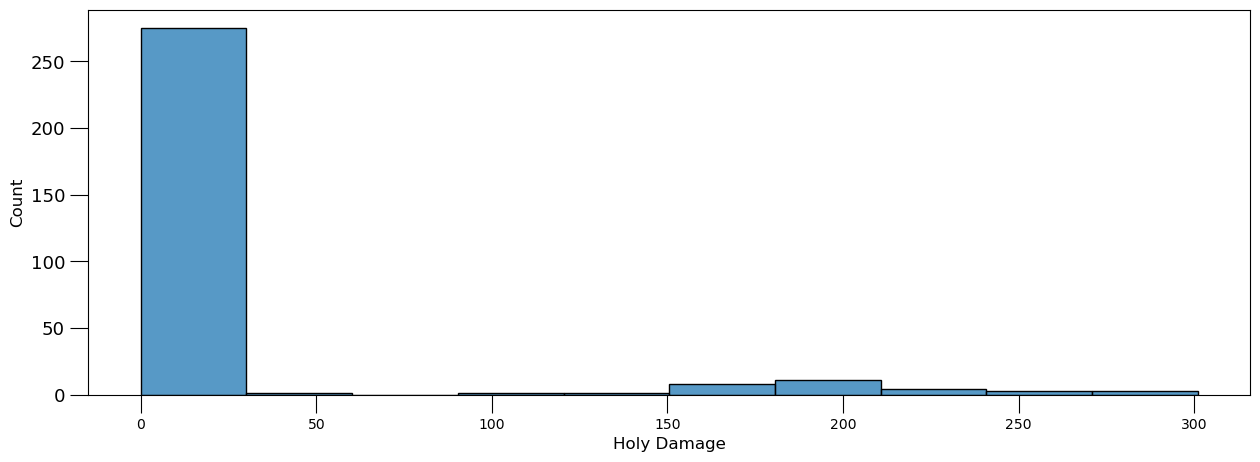

In [50]:
fig, ax = plt.subplots(figsize=(15,5))
sns.histplot(data=df, x='Hol');
plt.ylabel("Count", size = 12)
plt.xlabel("Holy Damage", size = 12)
plt.yticks(size=13)
plt.tick_params(size=13)

#### Comparing weight vs physical damage

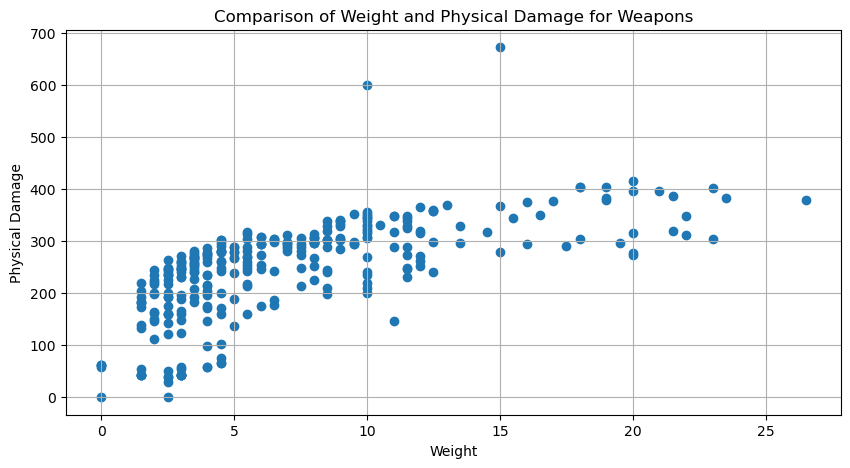

In [64]:
# Sort the data by physical damage in descending order
sorted_data = df.sort_values(by='Phy', ascending=False)

# Plotting
plt.figure(figsize=(10, 5))  # Set the figure size
plt.scatter(df['Wgt'], df['Phy'])  # Create the scatter plot
plt.xlabel('Weight')  # Set the x-axis label
plt.ylabel('Physical Damage')  # Set the y-axis label
plt.title('Comparison of Weight and Physical Damage for Weapons')  # Set the plot title
plt.grid(True)  # Add gridlines
plt.show()  # Show the plot


As the weapon gets heavier, we see a trend of it providing more physical damage. There are two outliers, both provide the most amount of damage although its not the heaviest weapon. One of them is explored below. 

In [16]:
# Find the row with the highest physical damage
max_damage_row = df.loc[df['Phy'].idxmax()]

# Find the row with the highest physical damage
min_damage_row = df.loc[df['Phy'].idxmin()]

In [18]:
# Print 
print("Row with the highest physical damage:")
print(max_damage_row["Name"])

Row with the highest physical damage:
Jar Cannon


<img src="jar_cannon.png" alt="Image" width="10%">

In [19]:
print("Row with the lowest physical damage:")
print(min_damage_row["Name"])

Row with the lowest physical damage:
Cipher Pata


<img src="cipherpatajpg.jpg" alt="Image" width="30%">

### Stamina Usage

### Blocking Damage

### Special Effects 

### Boost and Weight

### Upgrading

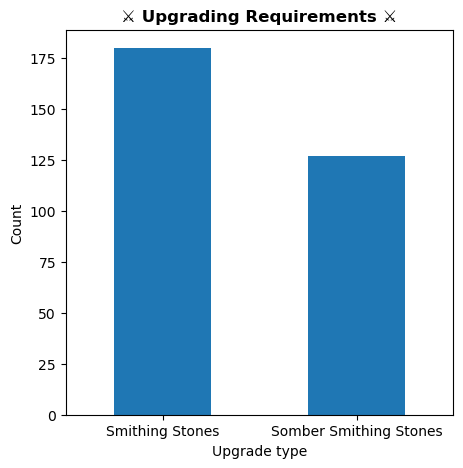

In [63]:
# Count the number of occurrences of each weapon type
weapon_counts = df['Upgrade'].value_counts()

# Plotting
plt.figure(figsize=(5, 5))  # Set the figure size
weapon_counts.plot(kind='bar', width = 0.5)  # Create a bar plot
plt.xlabel('Upgrade type')  # Set the x-axis label
plt.ylabel('Count')  # Set the y-axis label
plt.title('⚔️ Upgrading Requirements ⚔️', size=12, weight="bold")  # Set the plot title
plt.xticks(rotation=0)  # Rotate the x-axis labels for better readability
plt.show()  # Show the plot

Most weapons require smithing stones to be upgraded, however there are weapons that require somber smithing stones which are found in later parts of the game.